# Machine Learning
데이터로부터 머신이 직접 학습하는 과정

### 1. Iris 데이터셋
sklearn의 datasets라는 모듈에는 데이터셋이 있음.

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
iris.target # y 라벨링 목록

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
iris.target_names # y 라벨은 총 3개 (0, 1, 2)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
iris.feature_names # 데이터 컬럼명 총4개

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
len(iris.target) # 총 row는 150개

150

### 2. DataFrame으로 변환

In [16]:
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


##### 데이터프레임 마지막에 species (y라벨) 도 추가해주기

In [17]:
iris_df['species'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 3. 시각화

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

##### box plot
5.5에서 6.5 사이는 3개 모두 겹치는 구간

<Axes: xlabel='sepal length (cm)', ylabel='species'>

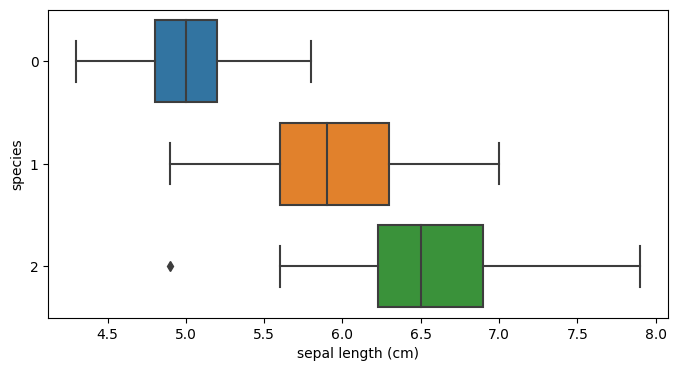

In [23]:
plt.figure(figsize=(8,4))
sns.boxplot(x='sepal length (cm)', y='species', data=iris_df, orient='h')

##### pair plot
- 'petal length (cm)'와  'petal width (cm)'에서는 구분이 쉬운 편

<Figure size 800x400 with 0 Axes>

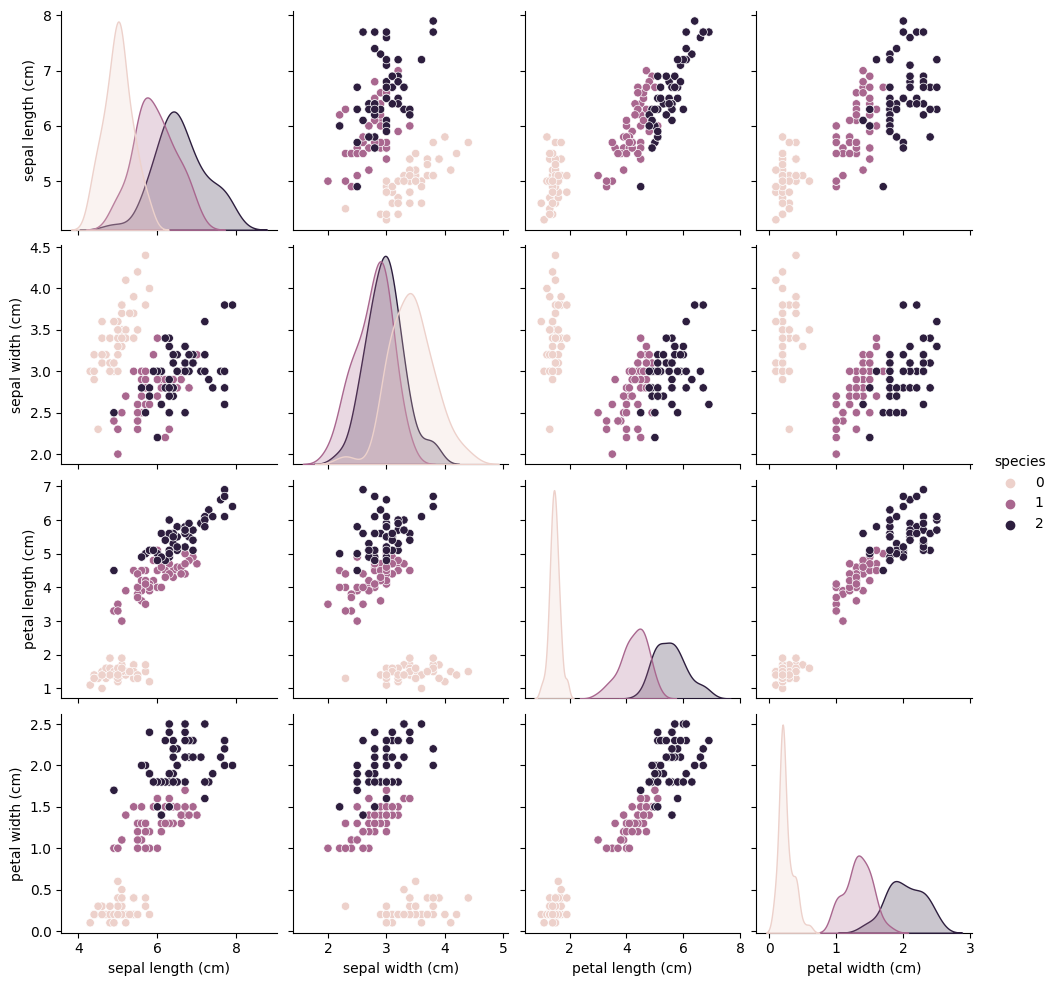

In [27]:
plt.figure(figsize=(8,4))
sns.pairplot(iris_df, hue='species')

### 4. Decision Tree
- 분류의 조건을 명시하여 어떤 근거로 분류되는지 쉽게 파악 가능한 모델

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

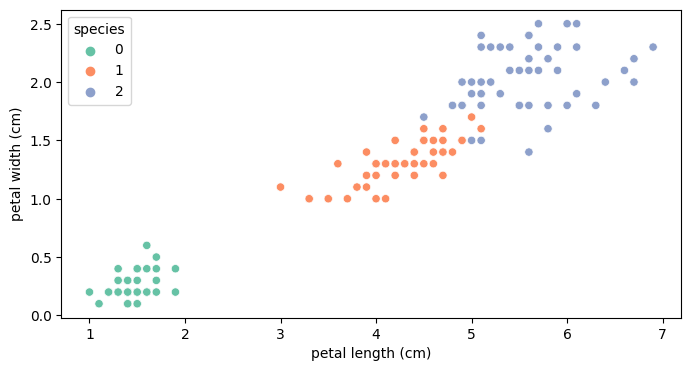

In [30]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=iris_df, hue='species', palette='Set2')

##### 0번 클래스는 쉽게 분류 가능하므로, 1번과 2번에 초점 맞춰 그래프 띄우기

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

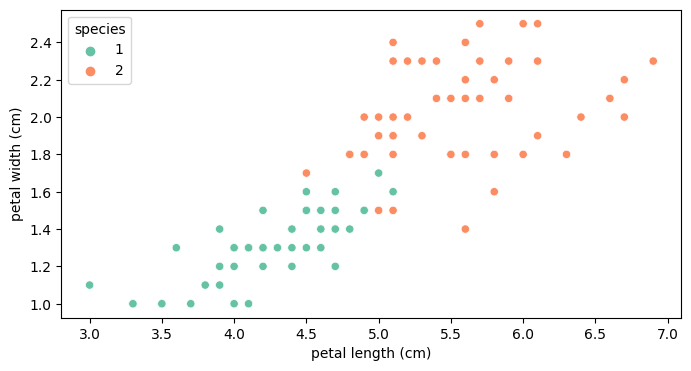

In [31]:
iris_df_1and2 = iris_df[iris_df.species != 0]

plt.figure(figsize=(8,4))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=iris_df_1and2, hue='species', palette='Set2')

##### 참고 ) 엔트로피 공식
- 엔트로피는 점점 커지는 방향으로 진행한다.
- 엔트로피가 클수록 혼잡, 여러 데이터 섞임

#### log 계산으로 인한 문제 발생
- 그래서 등장한 것이 **지니계수**

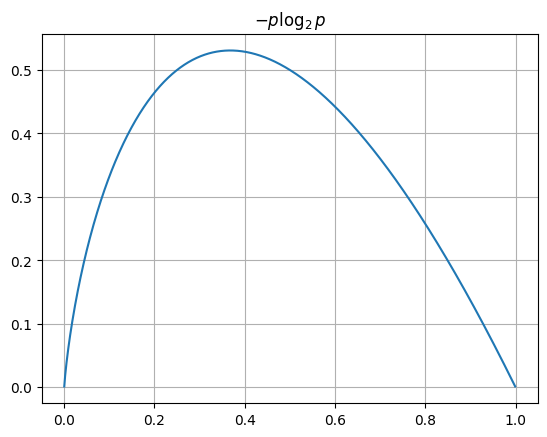

In [38]:
import numpy as np
import matplotlib.pyplot as plt

p = np.arange(0.0001, 1, 0.001)
plt.grid()
plt.title(r'$-p\log_{2}{p}$')
plt.plot(p, -p*np.log2(p))

plt.show()


### 5. Scikit Learn
- 직접 모든 모델을 구현하지 않아도 공유된 모델 가져와 사용가능하게 해주는 library

##### (1) DecisionTreeClassifier 모델을 생성 -> iris 데이터와 라벨을 동시에 입력하여 학습 fit

In [41]:
from sklearn.tree import DecisionTreeClassifier
iris_tree = DecisionTreeClassifier()

# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 중에 마지막 2개만 feature로 사용
feature = iris.data[:, 2:]
label = iris.target

# fit : 데이터와 정답을 매칭하여 학습시킨다.
iris_tree.fit(feature, label)

DecisionTreeClassifier()

##### (2) 학습한 DecisionTreeClassifier 모델에 라벨없는 데이터 넣어서 predict

In [42]:
y_pred_tr = iris_tree.predict(iris.data[:,2:])
y_pred_tr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

##### (3) accuracy_score 이용해서 정답과 예측값을 비교해서 몇개 맞췄는지 비교

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(label, y_pred_tr)

0.9933333333333333

##### tree 구조 시각화

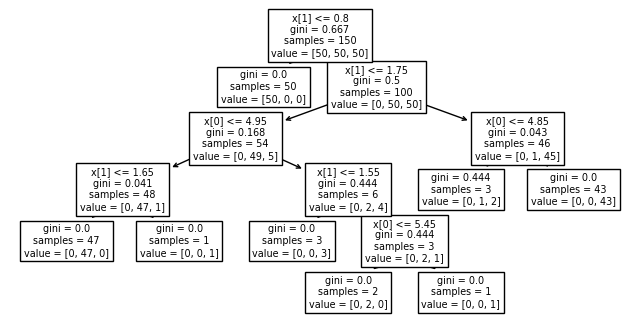

In [58]:
from sklearn.tree import plot_tree

plt.figure(figsize=(8,4))
plot_tree(iris_tree)
plt.show()

##### Decision Tree가 어떻게 구성됐는지 "결정경계"를 확인
- mlxtend 라이브러리 이용

In [ ]:
# !pip install mlxtend

<Axes: >

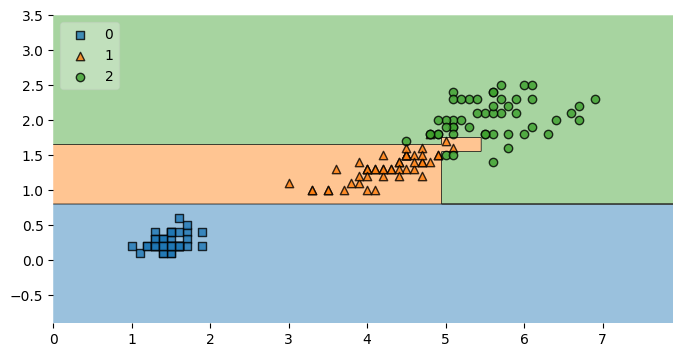

In [47]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(8, 4))
plot_decision_regions(X=iris.data[:,2:], y=iris.target, clf=iris_tree, legend=2)

### 6. 과적합 Overfitting
- 위 이미지에서 결정 경계면이 복잡한 부분이 존재함.
- 과연 저 부분이 올바를까? 라는 의문을 가져야 한다.
- 학습데이터가 전체를 대변하지 않으므로 정확도가 너무 높은 것도 과적합을 일으키는 문제가 된다.

### 과적합 방지 1 : 데이터의 분리 trian과 test

In [48]:
from sklearn.model_selection import train_test_split

feature = iris.data[:, 2:]
label = iris.target

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=13)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 2), (30, 2), (120,), (30,))

In [52]:
y_train

array([2, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 1, 0, 1, 0, 1,
       1, 2, 0, 1, 0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 0, 0, 0, 1,
       1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 2,
       0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 2,
       0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2,
       0, 1, 1, 1, 2, 2, 1, 0, 1, 1])

##### 0, 1, 2가 골고루 섞여서 분리됐는지 확인해보기
- 120개를 40/40/40으로 되는게 베스트

In [54]:
from collections import Counter

counter = Counter(y_train)

count_0 = counter[0]
count_1 = counter[1]
count_2 = counter[2]

print("Count of 0:", count_0)
print("Count of 1:", count_1)
print("Count of 2:", count_2)

Count of 0: 41
Count of 1: 42
Count of 2: 37


##### 라벨 별로 골고루 분리되도록 하는 옵션을 지정하면 된다. stratify = label

In [55]:
from sklearn.model_selection import train_test_split

feature = iris.data[:, 2:]
label = iris.target

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, stratify = label, random_state=13)

In [56]:
from collections import Counter

counter = Counter(y_train)

count_0 = counter[0]
count_1 = counter[1]
count_2 = counter[2]

print("Count of 0:", count_0)
print("Count of 1:", count_1)
print("Count of 2:", count_2)

Count of 0: 40
Count of 1: 40
Count of 2: 40


### 과적합 방지 2 : depth 제한 (규제)
- max_depth=2

In [62]:
from sklearn.tree import DecisionTreeClassifier
iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)

# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 중에 마지막 2개만 feature로 사용
feature = iris.data[:, 2:]
label = iris.target

# fit : 데이터와 정답을 매칭하여 학습시킨다.
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

- depth 5에서 2로 줄었고
- 데이터 라벨별 50개에서 40개로 줄었음.

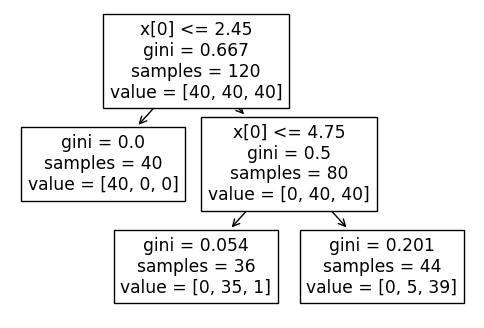

In [63]:
from sklearn.tree import plot_tree

plt.figure(figsize=(6,4))
plot_tree(iris_tree)
plt.show()

#### 학습데이터 이용해 정확도 측정하면
- 0.9933333333333333 에서 0.95로 낮아짐

In [67]:
from sklearn.metrics import accuracy_score
y_pred_tr = iris_tree.predict(X_train)
accuracy_score(y_train, y_pred_tr)

0.95

##### 결정경계가 단순해져서, 과적합이 완화됨.
- 오류는 늘었어도 이게 일반화된 모델이다

<Axes: >

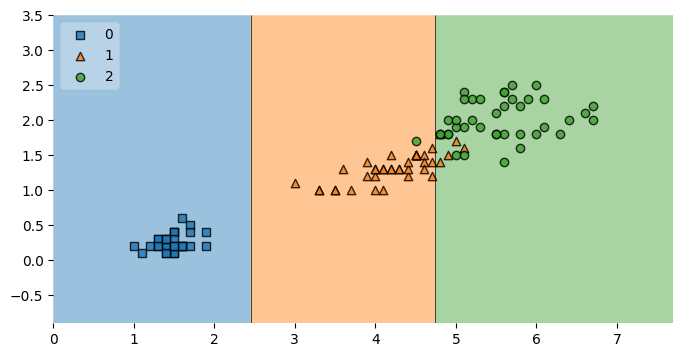

In [66]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(8, 4))
plot_decision_regions(X=X_train, y=y_train, clf=iris_tree, legend=2)

### 학습데이터 정확도 95% 인데, 테스트데이터도 비슷한 정확도를 보이면 일반화된 모델이라는 뜻!
- 0.966 으로 과적합은 아님

In [68]:
from sklearn.metrics import accuracy_score
y_pred_tr = iris_tree.predict(X_test)
accuracy_score(y_test, y_pred_tr)

0.9666666666666667

#### 테스트데이터 어떤게 선정됐는지 시각화

<Axes: >

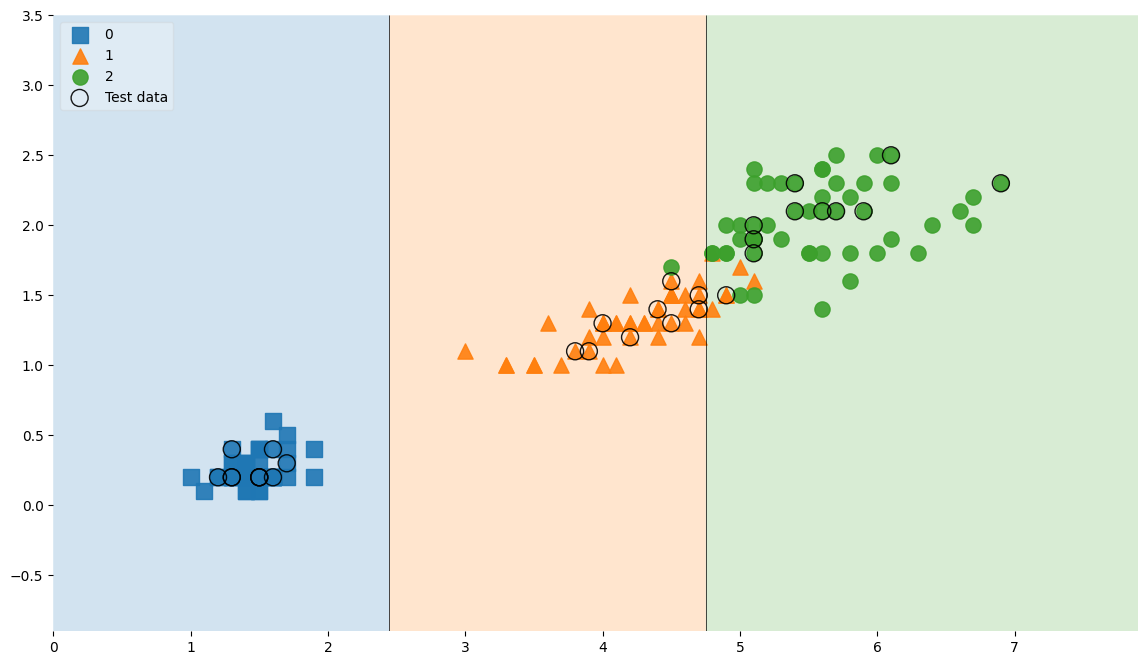

In [73]:
scatter_highlight_kwargs = {'s':150, 'label':'Test data', 'alpha':0.9}
scatter_kwargs = {'s':120, 'edgecolor': None, 'alpha':0.9}

plt.figure(figsize=(14,8))
plot_decision_regions( X=feature, y=label, 
                      X_highlight=X_test, clf=iris_tree, legend=2, 
                      scatter_highlight_kwargs=scatter_highlight_kwargs,
                      scatter_kwargs = scatter_kwargs,
                      contourf_kwargs={'alpha':0.2}
                    )

### feature 4개 중 2개만 했는데 이번에는 4개 모두 사용

In [75]:
from sklearn.model_selection import train_test_split

feature = iris.data
label = iris.target

X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, stratify=label, random_state=13)

In [76]:
from sklearn.tree import DecisionTreeClassifier
iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [77]:
from sklearn.metrics import accuracy_score
y_pred_tr = iris_tree.predict(X_train)
accuracy_score(y_train, y_pred_tr)

0.95

In [78]:
y_pred_tr = iris_tree.predict(X_test)
accuracy_score(y_test, y_pred_tr)

0.9666666666666667

### 테스트 방법
- shape이 맞아야 함. 이중리스트로 입력해줘야 함
- 예측 확률을 알고 싶을 때 **predict_proba** 사용

In [83]:
from sklearn.metrics import accuracy_score
y_pred_tr = iris_tree.predict(np.array([[4.3, 2.0, 1., 3.0]]))
y_pred_tr

array([1])

##### 어떤 라벨로 예측했는지

In [91]:
iris.target_names[iris_tree.predict(np.array([[4.3, 2.0, 1., 3.0]]))]

array(['versicolor'], dtype='<U10')

##### 각 라벨별 정답일 확률값

In [86]:
iris_tree.predict_proba(np.array([[4.3, 2.0, 1., 3.0]]))

array([[0.        , 0.97222222, 0.02777778]])

##### 어떤 feature가 중요한지 
- 'petal length (cm)',  'petal width (cm)' 가 중요

In [92]:
iris_tree.feature_importances_

array([0.        , 0.        , 0.42189781, 0.57810219])

In [101]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

##### Zip함수 이용하여 두개의 리스트를 묶어 packing 

In [100]:
dict(zip(iris.feature_names, iris_tree.feature_importances_))

{'sepal length (cm)': 0.0,
 'sepal width (cm)': 0.0,
 'petal length (cm)': 0.421897810218978,
 'petal width (cm)': 0.578102189781022}

In [102]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))

C:\Users\User\AppData\Local\Temp\ipykernel_940\3510566465.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML
